In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
car_data = pd.read_csv("C:/Users/AKASH HN/Downloads/Dataset/car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


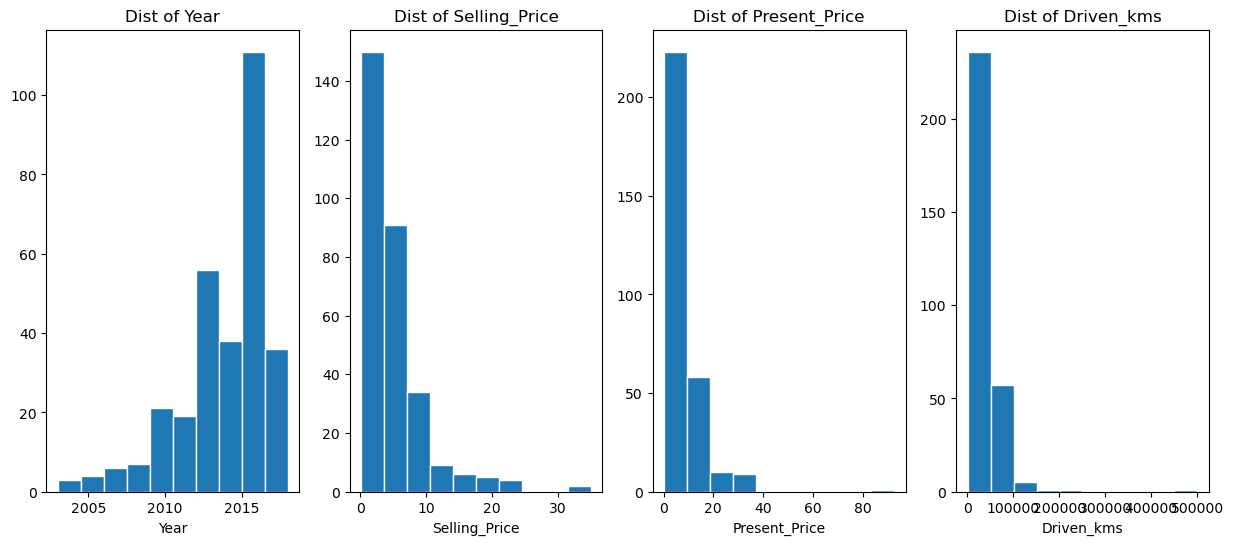

In [6]:
num_cols = [col for col in car_data.columns if col in car_data.select_dtypes(include  ='number').columns and col != 'Owner']
cat_cols = [col for col in car_data.columns if col not in num_cols and col != 'Car_Name']
fig, ax = plt.subplots(1, len(num_cols), figsize = (15, 6))
for i, col in enumerate(num_cols):
    ax[i].hist(car_data[col], edgecolor = 'w', bins = 10)
    ax[i].set_xlabel(col)
    ax[i].set_title(f'Dist of {col}')
plt.show()

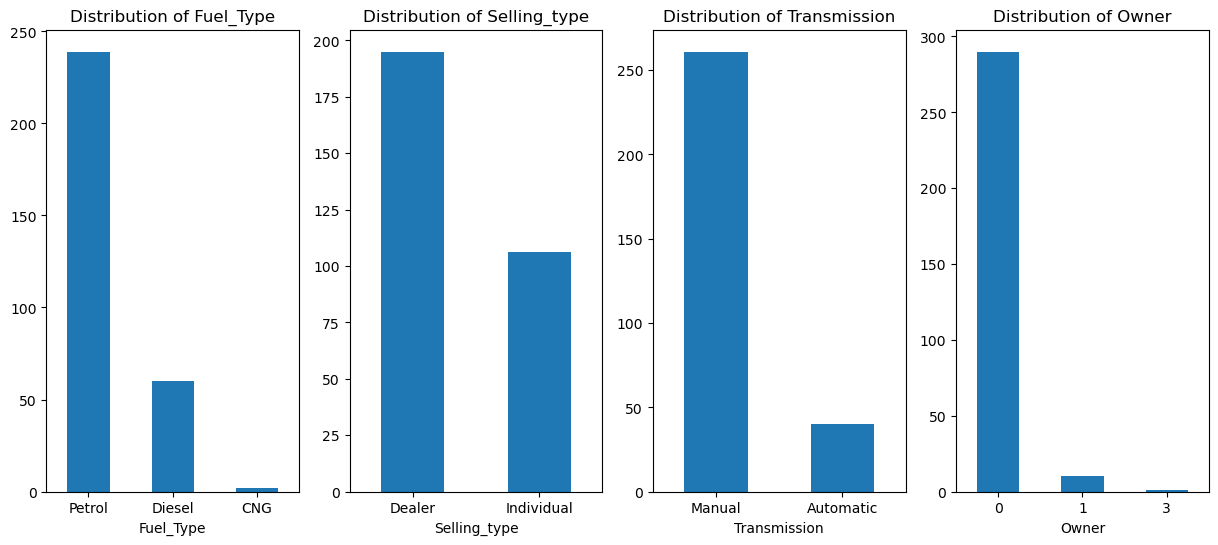

In [7]:
fig, ax = plt.subplots(1, len(cat_cols), figsize = (15,6))
for i, col in enumerate(cat_cols):
    car_data[col].value_counts().plot.bar(rot = 0, ax = ax[i])
    ax[i].set_title(f'Distribution of {col}')

In [9]:
encoder = LabelEncoder()
for col in cat_cols:
    car_data[col] = encoder.fit_transform(car_data[col])
car_data['Car_Name'] = encoder.fit_transform(car_data['Car_Name'])
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


<Axes: >

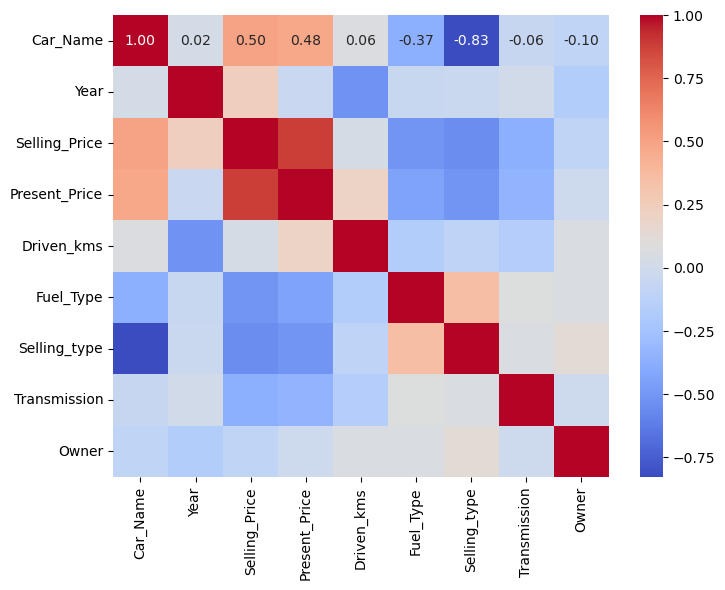

In [10]:
corr = car_data.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr, cmap = 'coolwarm', annot= True, fmt = '.2f')

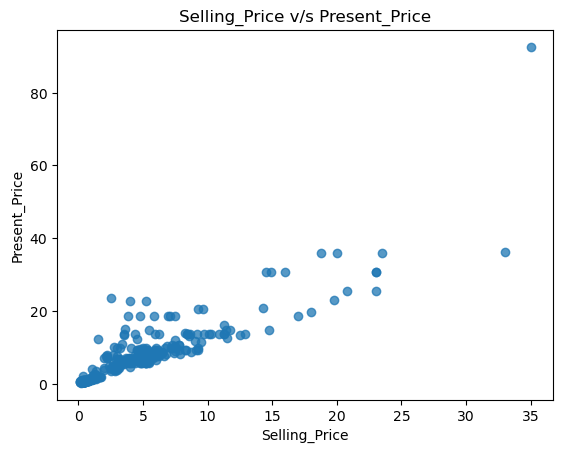

In [11]:
plt.scatter(car_data['Selling_Price'], car_data['Present_Price'], alpha = 0.75)
plt.xlabel('Selling_Price')
plt.ylabel('Present_Price')
plt.title('Selling_Price v/s Present_Price' )
plt.show()

In [12]:
X = car_data.drop('Selling_Price', axis = 1)
y = car_data['Selling_Price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
x_pred = model.predict(X_train)
print('R2 Score for training data: ', r2_score(y_train, x_pred))
print('Mean squared error for training data: ', mean_squared_error(y_train, x_pred))

R2 Score for training data:  0.8826453673535382
Mean squared error for training data:  3.102511092725726


In [15]:
y_pred = model.predict(X_test)
print(' R2 Score for test data: ', r2_score(y_test, y_pred))
print('Mean squared error for test data: ', mean_squared_error(y_test, y_pred))

 R2 Score for test data:  0.8481127132883588
Mean squared error for test data:  3.498812430603567


In [16]:
X.sample(5)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
174,35,2015,0.72,38600,2,1,1,0
248,83,2013,4.60,30000,2,0,1,0
129,60,2017,0.84,5000,2,1,1,0
102,42,2017,1.78,4000,2,1,1,0
24,96,2013,4.41,56879,2,0,1,0


In [17]:
new_data = np.array([[50, 2011, 5.0, 20000, 2, 0, 1, 0]])
new_df = pd.DataFrame(new_data, columns = X.columns)
new_pred = model.predict(new_df)
print(f'Predicted new data: {new_pred[0]:.2f}')

Predicted new data: 2.75
